In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-image-dataset/Dataset/45.jpg
/kaggle/input/medical-image-dataset/Dataset/56.jpg
/kaggle/input/medical-image-dataset/Dataset/89.jpg
/kaggle/input/medical-image-dataset/Dataset/20.jpg
/kaggle/input/medical-image-dataset/Dataset/58.jpg
/kaggle/input/medical-image-dataset/Dataset/6.jpg
/kaggle/input/medical-image-dataset/Dataset/109.jpg
/kaggle/input/medical-image-dataset/Dataset/76.jpg
/kaggle/input/medical-image-dataset/Dataset/71.jpg
/kaggle/input/medical-image-dataset/Dataset/115.jpg
/kaggle/input/medical-image-dataset/Dataset/5.jpg
/kaggle/input/medical-image-dataset/Dataset/8.jpg
/kaggle/input/medical-image-dataset/Dataset/84.jpg
/kaggle/input/medical-image-dataset/Dataset/85.jpg
/kaggle/input/medical-image-dataset/Dataset/67.jpg
/kaggle/input/medical-image-dataset/Dataset/118.jpg
/kaggle/input/medical-image-dataset/Dataset/82.jpg
/kaggle/input/medical-image-dataset/Dataset/30.jpg
/kaggle/input/medical-image-dataset/Dataset/97.jpg
/kaggle/input/medical-image-dat

In [2]:
from keras.preprocessing import image

2024-07-20 11:32:28.036688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 11:32:28.036816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 11:32:28.170272: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_images = sorted(os.listdir('/kaggle/input/medical-image-dataset/Dataset'))

In [4]:
train_image = []
for im in train_images:
    img = image.load_img('/kaggle/input/medical-image-dataset/Dataset/'+ im, target_size=(64,64), color_mode= 'grayscale')
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
train_df = np.array(train_image)

In [5]:

import matplotlib.pyplot as plt

def show_img(dataset):
    f, ax = plt.subplots(1,5)
    f.set_size_inches(40, 20)
    for i in range(5,10):
        ax[i-5].imshow(dataset[i].reshape(64,64), cmap='gray')
    plt.show()

In [6]:

def add_noise(image):
    row,col,ch= image.shape
    mean = 0
    sigma = 1
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss*0.07
    return noisy

In [7]:
noised_df= []

for img in train_df:
    noisy= add_noise(img)
    noised_df.append(noisy)

In [8]:
noised_df= np.array(noised_df)

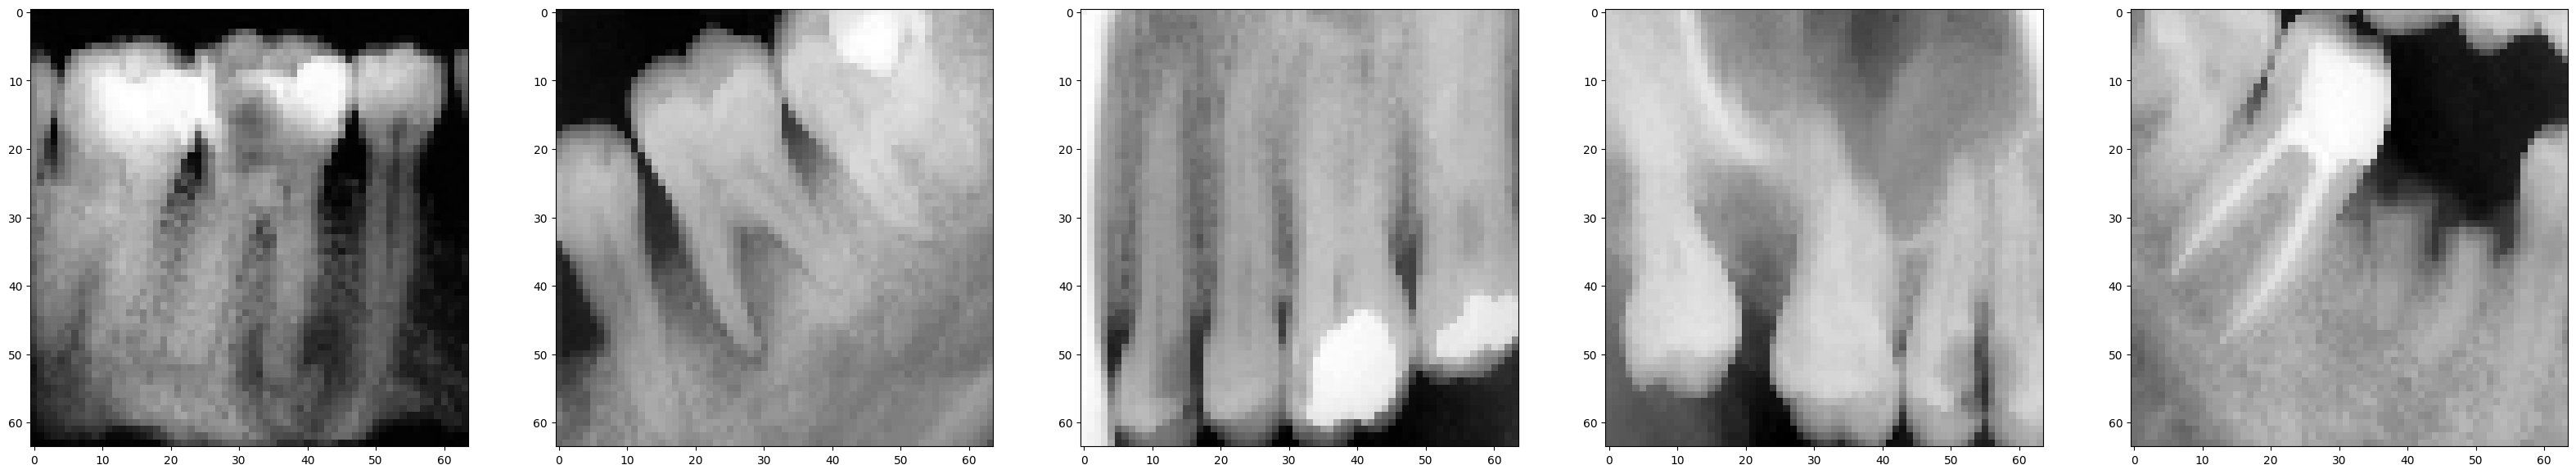

In [9]:
show_img(train_df)

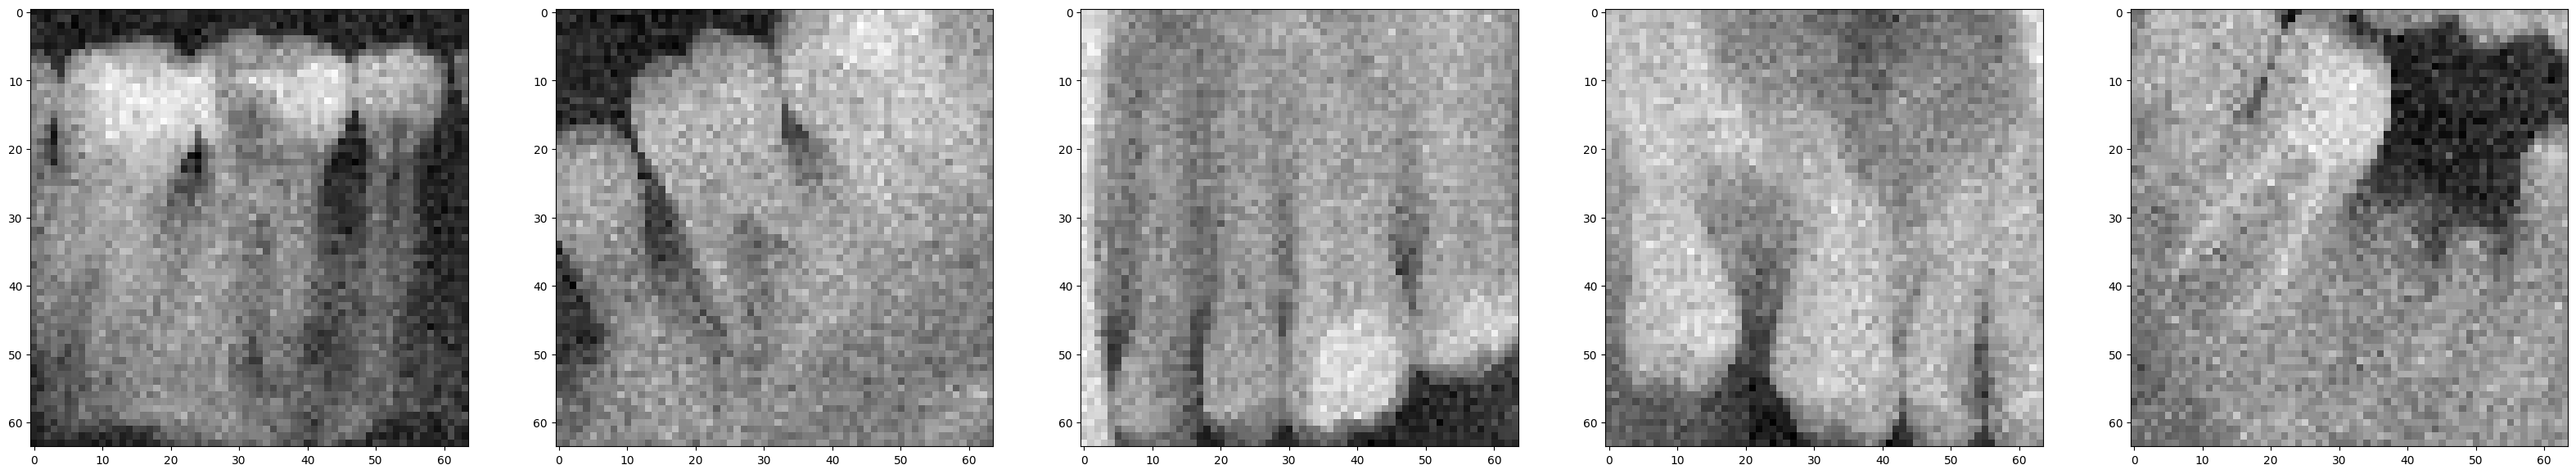

In [10]:
show_img(noised_df)

In [11]:
noised_df.shape

(120, 64, 64, 1)

In [12]:
train_df.shape

(120, 64, 64, 1)

In [13]:
xnoised= noised_df[0:100]
xtest= noised_df[100:]

In [14]:
xnoised.shape

(100, 64, 64, 1)

In [15]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K

def autoencoder():
    
    input_img = Input(shape=(64,64,1), name='image_input')
    
    #enoder 
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='Conv3')(x)
    x = MaxPooling2D((2, 2), padding='same', name='pool3')(x)
    
    # Bottleneck
    bottleneck = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    
    #decoder
    x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv4')(bottleneck)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv5')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv6')(x)
    x = UpSampling2D((2,2), name='upsample3')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv7')(x)
    
    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder

In [16]:
model= autoencoder()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)        │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 64, 64, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 8, 8, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsample1 (UpSampling2D)        │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv5 (Conv2D)                  │ (None, 16, 16, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsample2 (UpSampling2D)        │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv6 (Conv2D)                  │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsample3 (UpSampling2D)        │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv7 (Conv2D)                  │ (None, 64, 64, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 812,929 (3.10 MB)

 Trainable params: 812,929 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
with tf.device('/device:GPU:0'):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    model.fit(xnoised, xnoised, epochs=40, batch_size=10, validation_data=(xtest, xtest), callbacks=[early_stopping])

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.6914 - val_loss: 0.6829
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.6800 - val_loss: 0.6748
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.6674 - val_loss: 0.6564
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.6482 - val_loss: 0.6342
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 0.6157 - val_loss: 0.6161
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - loss: 0.6022 - val_loss: 0.6014
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - loss: 0.5949 - val_loss: 0.5899
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.5824 - val_loss: 0.5839
Epoch 9/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - loss: 0.5856 - val_loss: 0.5793
Epoch 10/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.5740 - val_loss: 0.5764
Epoch 11/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.5664 - val_loss: 0.5749
Epoch 12/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step

In [19]:
xtrain= train_df[100:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


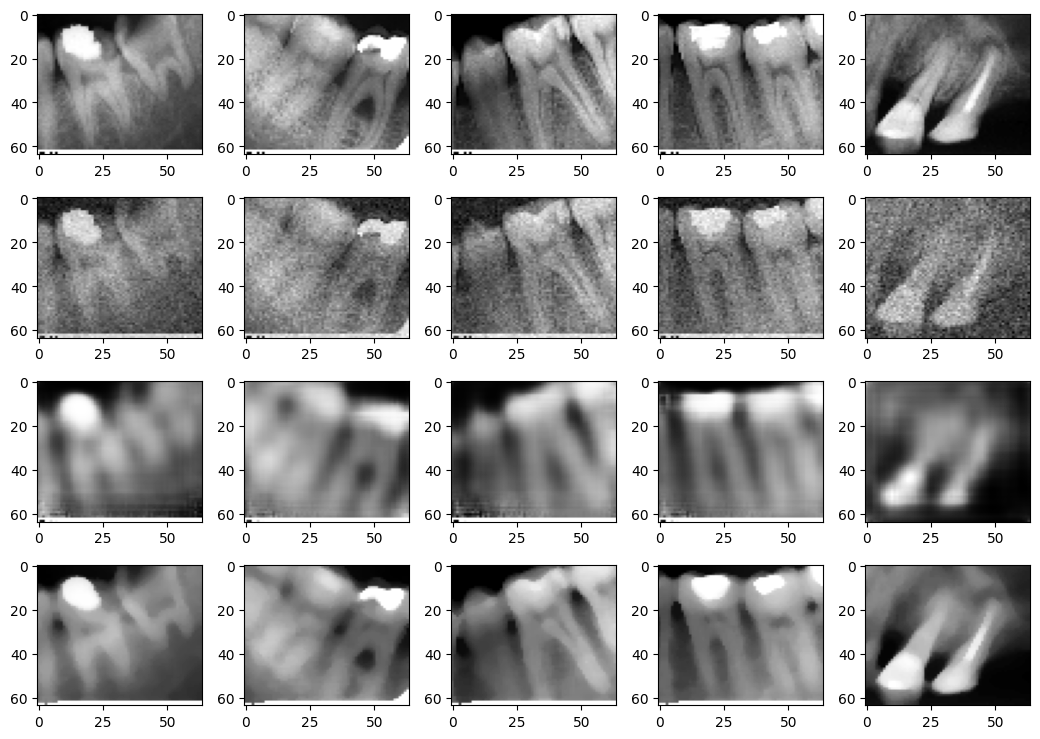

In [20]:
import cv2

pred= model.predict(xtest[:5])
def plot_predictions(y_true, y_pred):    
    f, ax = plt.subplots(4, 5)
    f.set_size_inches(10.5,7.5)
    for i in range(5):
        ax[0][i].imshow(np.reshape(xtrain[i], (64,64)), aspect='auto', cmap='gray')
        ax[1][i].imshow(np.reshape(y_true[i], (64,64)), aspect='auto', cmap='gray')
        ax[2][i].imshow(np.reshape(y_pred[i], (64,64)), aspect='auto', cmap='gray')
        ax[3][i].imshow(cv2.medianBlur(xtrain[i], (5)), aspect='auto', cmap='gray')
       
    plt.tight_layout()
plot_predictions(xtest[:5], pred[:5])

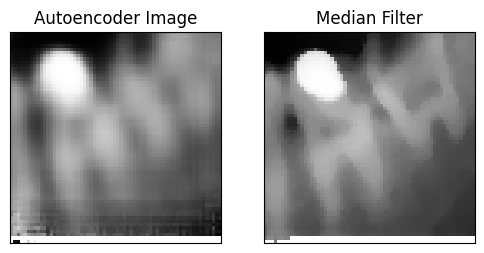

In [21]:
new_image = cv2.medianBlur(xtrain[0], (5))
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(pred[0].reshape(64,64), cmap='gray')
plt.title('Autoencoder Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_image, cmap='gray')
plt.title('Median Filter')
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
from math import log10, sqrt 
  
def PSNR(original, denoiced): 
    mse = np.mean((original - denoiced) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
value1 = PSNR(xtest[0], new_image)
value2 = PSNR(xtest[0], pred[0])

print(f"PSNR value for Denoised image is {value2} dB while for Median filtered image is {value1} dB")

PSNR value for Denoised image is 68.22754978530422 dB while for Median filtered image is 58.44450155924384 dB
